### Код к 13 задаче
**ТЗ:** *Решение однородного ДУ 2го порядка с переменными коэффициентами по разностной схеме*

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

In [18]:
a2 = lambda x: 1
a1 = lambda x: -2
a0 = lambda x: 1
dx = 1e-2
x_0 = 0
y_0 = 1
x_n = 3
y_n = 0.5 * np.exp(3)
n = int((x_n - x_0) / dx)

In [19]:
A = lambda x: a0(x) / dx ** 2 + a1(x) / dx
B = lambda x: -2 * a0(x) / dx ** 2 - a1(x) / dx + a2(x)
C = lambda x: a0(x) / dx ** 2

In [20]:
x, alpha, beta = x_0, [0], [y_0]
for i in range(1, n):
    d = B(x + dx) + C(x + dx) * alpha[-1]
    alpha.append(-A(x + dx) / d)
    beta.append(-C(x + dx) * beta[-1] / d)
    x += dx

In [21]:
y = [0] * (n - 1) + [y_n]
for i in range(n - 1, 0, -1):
    y[i - 1] = (alpha[i] * y[i] + beta[i])

In [22]:
space = np.arange(x_0, x_n, dx)

f = lambda x, y: np.vstack((y[1], y[0] - 2 * y[1] + y[0]))
bc = lambda ya, yb: np.array([ya[0] - y_0, yb[0] - y_n])

x_init = np.linspace(x_0, x_n, n)
y_init = np.zeros((2, x_init.size))
sol = solve_bvp(f, bc, x_init, y_init)

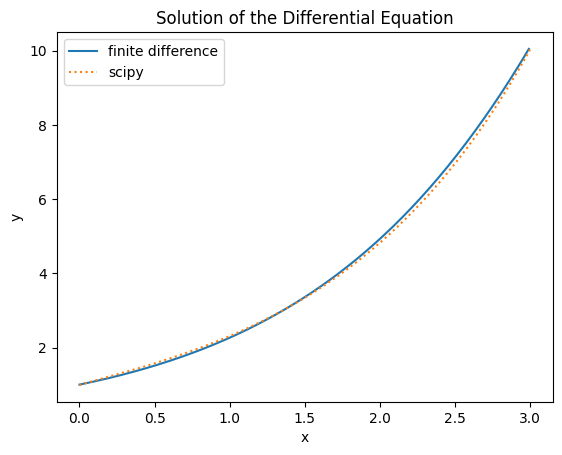

In [23]:
plt.plot(space, y, label='finite difference')
plt.plot(sol.x, sol.sol(sol.x)[0], label='scipy', linestyle='dotted')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution of the Differential Equation')
plt.show()

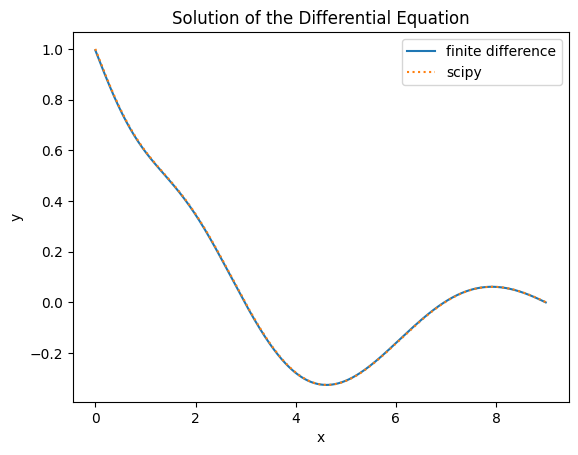

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

a2 = lambda x: 1
a1 = lambda x: x
a0 = lambda x: 1
r = lambda x: np.cos(x)

dx = 1e-2
x_0 = 0
y_0 = 1
x_n = 9

# Число шагов
n = int((x_n - x_0) / dx)

# Аналитическое вычисление y_n (если известно аналитическое решение, иначе используем численные методы)
# Для примера, допустим, y_n = 1, вы можете заменить это значение, если известно аналитическое решение
y_n = 0

# Определение коэффициентов для разностной схемы
A = lambda x: a0(x) / dx ** 2 + a1(x) / (2 * dx)
B = lambda x: -2 * a0(x) / dx ** 2 + a2(x)
C = lambda x: a0(x) / dx ** 2 - a1(x) / (2 * dx)

# Инициализация массивов для разностной схемы
x, alpha, beta = x_0, [0], [y_0]
for i in range(1, n):
    xi = x + i * dx
    d = B(xi) + C(xi) * alpha[-1]
    alpha.append(-A(xi) / d)
    beta.append((r(xi) - C(xi) * beta[-1]) / d)

# Численное решение методом разностной схемы
y = [0] * (n - 1) + [y_n]
for i in range(n - 1, 0, -1):
    y[i - 1] = alpha[i] * y[i] + beta[i]

space = np.arange(x_0, x_n, dx)

# Численное решение с использованием scipy.solve_bvp
def fun(x, y):
    return np.vstack((y[1], r(x) - a1(x) * y[1] - a0(x) * y[0]))

def bc(ya, yb):
    return np.array([ya[0] - y_0, yb[0] - y_n])

x_init = np.linspace(x_0, x_n, n)
y_init = np.zeros((2, x_init.size))
sol = solve_bvp(fun, bc, x_init, y_init)

# Построение графиков
plt.plot(space, y, label='finite difference')
plt.plot(sol.x, sol.sol(sol.x)[0], label='scipy', linestyle='dotted')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution of the Differential Equation')
plt.show()


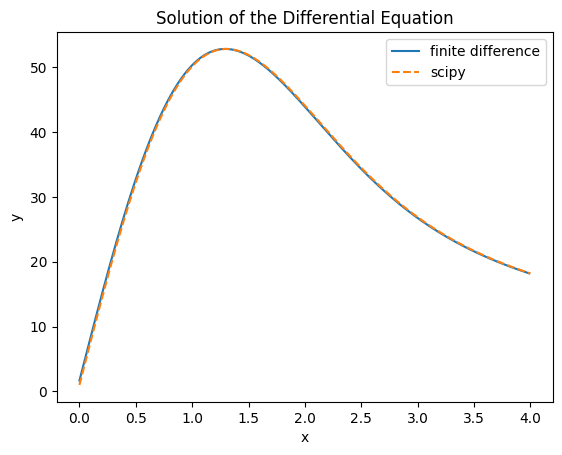

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp

# Определение новых коэффициентов и правой части
a2 = lambda x: 1
a1 = lambda x: x
a0 = lambda x: 1
r = lambda x: np.cos(x)

dx = 1e-2
x_0 = 0
y_0 = 1
x_n = 4

# Число шагов
n = int((x_n - x_0) / dx)

# Аналитическое вычисление y_n (если известно аналитическое решение, иначе используем численные методы)
def analytical_solution(x):
    return (1 - 1/6 * x) * np.exp(x)  # Для нашего примера

y_n = analytical_solution(x_n)

# Определение коэффициентов для разностной схемы
A = lambda x: a0(x) / dx ** 2 + a1(x) / (2 * dx)
B = lambda x: -2 * a0(x) / dx ** 2 + a2(x)
C = lambda x: a0(x) / dx ** 2 - a1(x) / (2 * dx)

# Инициализация массивов для разностной схемы
x, alpha, beta = x_0, [0], [y_0]
for i in range(1, n):
    xi = x + i * dx
    d = B(xi) + C(xi) * alpha[-1]
    alpha.append(-A(xi) / d)
    beta.append((r(xi) - C(xi) * beta[-1]) / d)

# Численное решение методом разностной схемы
y = [0] * (n - 1) + [y_n]
for i in range(n - 1, 0, -1):
    y[i - 1] = alpha[i] * y[i] + beta[i]

space = np.arange(x_0, x_n, dx)

# Численное решение с использованием scipy.solve_bvp
def fun(x, y):
    return np.vstack((y[1], r(x) - a1(x) * y[1] - a0(x) * y[0]))

def bc(ya, yb):
    return np.array([ya[0] - y_0, yb[0] - y_n])

x_init = np.linspace(x_0, x_n, n)
y_init = np.zeros((2, x_init.size))
sol = solve_bvp(fun, bc, x_init, y_init)

# Построение графиков
plt.plot(space, y, label='finite difference')
plt.plot(sol.x, sol.sol(sol.x)[0], label='scipy', linestyle='dashed')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Solution of the Differential Equation')
plt.show()
